# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to minimize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \min_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import pandas as pd
df = pd.read_csv('./data/hw2data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set to be the y variable in the dataframe from a and X to be the remaining features.

In [3]:
y = df['y']
X = df.drop(['y'],1)
print (X.shape)
print (y.shape)

(225, 500)
(225,)


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

/Users/Mars/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Optimal regularization parameter : 0.000691575882874


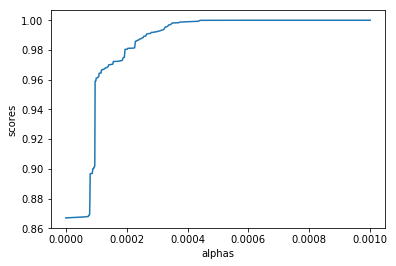

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#standardize data
scaler = StandardScaler()
XX = X.as_matrix().astype(np.float)
XX = scaler.fit_transform(X)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=10)


# Create linear regression object
alphas = np.logspace(-8,-3,1000)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha, max_iter = 10000)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    
plt.plot(alphas,scores)
plt.xlabel('alphas')
plt.ylabel('scores')
i_alpha_optim = np.argmax(scores)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

In [ ]:
plt.subplot(2, 1, 1)
train_errors = list()
test_errors = list()
for alpha in alphas:
    regr = Lasso(alpha=alpha, max_iter = 10000
#                 , fit_intercept = True, normalize = True
                )
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test))
alpha_optim=0
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print ("Optimal regularization parameter : %s" % alpha_optim)

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

In [ ]:
regr = Lasso(alpha=alpha_optim)
regr.fit(X_train,y_train)
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.bar(range(500),np.sort(regr.coef_))
plt.show()

### Answer:

Because Lasso regression, $\left| \beta_{1} \right| + \left| \beta_{2} \right| = C$, the level set of is most likely to be tangent to the level sets at a corner. Since there are only 4 possible directions where both of the coefficients are non-zero, making it highly unlikely that the level sets of L has a tangent parallel to any one of these directions. Therefore, it result in so many zero.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

In [ ]:
alpha_best = alpha_optim
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha = alpha_optim, 
#              fit_intercept = True, normalize = True
            )
scores = cross_val_score(regr, X, y, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha_optim))
plt.bar(range(1,6),scores)
plt.show()
print ("The scores for optimal alpha is: %s" %scores)

In [ ]:
from sklearn.utils import shuffle
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*4)

# Construct training and testing set.
for m in xrange(4):
    X, y = shuffle(X, y)
    scores = cross_val_score(regr, X, y, cv=5)
    axes = fig.add_subplot(1, 4, m+1)
    axes.set_xlabel('lambda')
    axes.set_ylabel('R^2')
    axes.set_title('Shuffle random subsets: ' + str(m+1))
    axes.bar(range(1,6),scores)
    print ("The scores for random subset %s is: %s" %(m+1,scores))

### Answer: 
As the figure shows that all of the performance on 5 folds are close to 1.

After several times of random sufftle, the performance of each subsets are still close to 1.

Therefore, the model work well on all random subsets.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [ ]:
from sklearn.cross_validation import KFold
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X2,np.array(y),Lasso,alpha=alpha_best)

In [ ]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

In [ ]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))